<a href="https://colab.research.google.com/github/sshrutii/LP3/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#importing the required packages 
import pandas as pd
import numpy as np

In [13]:
from google.colab import drive
drive.mount('/content/drive')

# Read dataset
dataset=pd.read_csv("/content/drive/My Drive/tdata.csv")

dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,age,income,gender,maritial status,buys
0,1,<21,high,male,single,no
1,2,<21,high,male,married,no
2,3,21-35,high,male,single,yes
3,4,>35,medium,male,single,yes
4,5,>35,low,female,single,yes
5,6,>35,low,female,married,no
6,7,21-35,low,female,married,yes
7,8,<21,medium,male,single,no
8,9,<21,low,female,married,yes
9,10,>35,medium,female,single,yes


In [14]:
#from age to martial status are inputs and buys is the output
#so now we will save the inputs in X and Outputs in Y
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,5].values #this is used to create an array of the output

#so x is dataframe and y is array format

x



,id,age,income,gender,maritial status
0,1,<21,high,male,single
1,2,<21,high,male,married
2,3,21-35,high,male,single
3,4,>35,medium,male,single
4,5,>35,low,female,single
5,6,>35,low,female,married
6,7,21-35,low,female,married
7,8,<21,medium,male,single
8,9,<21,low,female,married
9,10,>35,medium,female,single


In [15]:

#okay now next when any dataset or dataframe is given as an input to a ML algorithm then data has to be in the numerical format 
#as we can see in our dataset the data is not in numerical format so we have to convert it to the desired format
#this numerical format conversion is done by using a method of machine learning called as label encoding
#it converts string values into numerical patterns

#importing label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #then we will create an object of it ie le

#converting all string values to numbers 
x = x.apply(le.fit_transform)
print(x) 

#now next step is to import the decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier() # creating the object of it 
regressor.fit(x.iloc[:,1:5],y) #here we are providing the data to our dtc ie inputs and outputs
# x.iloc part will all the rows and in columns from 1 to 5-1 ie 4(bcz i loc takes i-1) and y is output

#so now the decision tree will be created

#so now in the above code the decision tree is created and trained , now we have to find what decision it will give for our test data ie the condition given to us
#note we have moved to part 2 of our assign ie where we get the deciosn for the condition given
#ie Age < 21, Income = Low, Gender = Female, Marital Status = Married]

#so now we create an array of encoded values which corresponds to the conditon above and give it as an input to our predictor
x_in=np.array([1,1,0,0])
y_pred = regressor.predict([x_in]) # what will be the value of y when we have the given x input
print(y_pred)

    id   age  income   gender  maritial status
0     0    1        0       1                1
1     1    1        0       1                0
2     2    0        0       1                1
3     3    2        2       1                1
4     4    2        1       0                1
5     5    2        1       0                0
6     6    0        1       0                0
7     7    1        2       1                1
8     8    1        1       0                0
9     9    2        2       0                1
10   10    1        2       0                0
11   11    0        2       1                0
12   12    0        0       0                1
13   13    2        2       1                0
['yes']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


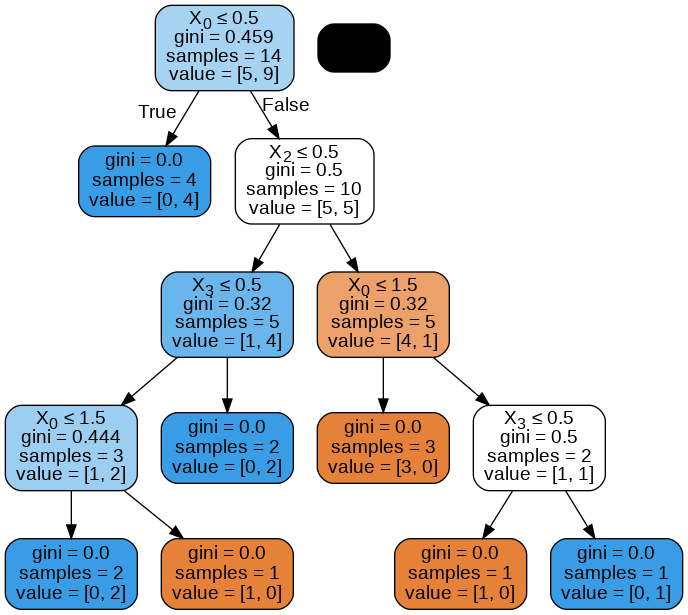

In [19]:
#now next step is finding the root node
#we have to import some packages
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data=StringIO()

export_graphviz(regressor,out_file=dot_data , filled=True , rounded=True ,special_characters=True) #we are just passing parametrs to the function
#filled rounded and sc are for deisgn of dct 

#now we will create the graph using pydotplus
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
# !dot -Tpng data.dot -o tree.png
Image('tree.png')